In [32]:
from statistics import mean, stdev
import pandas as pd
import torch
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
PARENT_DIR = os.path.abspath(os.path.join('.'))
sys.path.insert(0, PARENT_DIR)
sys.path.insert(0, PARENT_DIR+"/..")
from siganalogies import SIG2016_LANGUAGES

In [33]:

records16 = pkl.load(open("../0_ret-full-2016/results/ret.pkl","rb"))
#records16
#records16_3cos = pkl.load(open("../results/ret.pkl","rb"))

In [34]:
root16_am = "../3437442_baselines-50k-2016-alea-murena/results/baselines/"
root16_l = "../342_baselines-2016-lepage/results/baselines/"

def load(path, lang, model):
    df = pd.read_csv(path, index_col=0, converters={"fails":lambda x: x[1:-1].split(", "), "total":lambda x: x[1:-1].split(", ")})
    df["lang"] = lang
    df["model"] = model
    df["bal. acc"] = df["balacc"]
    df["bal. acc %"] = df["balacc"]*100
    df["harm. acc"] = df["harmacc"]
    df["harm. acc %"] = df["harmacc"]*100
    df["precision %"] = df["precision"]*100
    del df["balacc"]
    del df["harmacc"]
    if "fails" in df.columns:
        df["fails_pos"] = df["fails"].apply(lambda x: int(x[0]))
        df["fails_neg"] = df["fails"].apply(lambda x: int(x[1]))
        df["total_pos"] = df["total"].apply(lambda x: int(x[0]))
        df["total_neg"] = df["total"].apply(lambda x: int(x[1]))
        del df["fails"]
        del df["total"]
    return df
df_a = pd.concat(load(root16_am+f"{lang}/alea-0-50000.csv", lang, "alea") for lang in SIG2016_LANGUAGES)
df_m = pd.concat(load(root16_am+f"{lang}/murena-0-50000.csv", lang, "murena") for lang in SIG2016_LANGUAGES)
df_l = pd.concat(load(root16_l+f"{lang}/lepage-0-50000.csv", lang, "lepage") for lang in SIG2016_LANGUAGES)
df_baseline = pd.concat([df_a, df_m, df_l]).reset_index()
df_baseline["criterion"]=df_baseline["model"]
#df_baseline["criterion"]

In [35]:
def load(lang, model, version, path="../0/logs/ret/2016/{lang}/{model}/version_{version}/summary.csv"):
    df = pd.read_csv(path.format(lang=lang, model=model, version=version))
    df["language"] = lang
    df["Language"] = lang.capitalize()
    df["model"] = model
    df["criterion"] = model
    df["precision %"] = df["precision"]*100
    return df
dfs=[]
for language in SIG2016_LANGUAGES:
    for model in ["3CosAdd", "3CosMul"]:
        for version in range(10):
            try:
                _df = load(language, model, version)
                dfs.append(_df)
            finally:
                pass
df_3cos = pd.concat(dfs).reset_index()
print(len(df_3cos))
df_3cos.groupby(["lang", "criterion"]).count()
df_3cos.groupby(["lang", "criterion"]).mean()
df_3cos.groupby(["lang", "criterion"]).std()

220


index  precision  success@3  success@5  success@10  \
lang      criterion                                                       
arabic    3CosAdd      0.0   0.030858   0.030564   0.028318    0.024230   
          3CosMul      0.0   0.029695   0.032901   0.032148    0.030241   
finnish   3CosAdd      0.0   0.026080   0.015637   0.012237    0.008538   
          3CosMul      0.0   0.033779   0.022588   0.018155    0.013392   
georgian  3CosAdd      0.0   0.007325   0.002469   0.002127    0.002019   
          3CosMul      0.0   0.023807   0.010487   0.007234    0.004654   
german    3CosAdd      0.0   0.043522   0.037480   0.033983    0.029399   
          3CosMul      0.0   0.053108   0.046633   0.042763    0.037576   
hungarian 3CosAdd      0.0   0.027684   0.015333   0.011661    0.008045   
          3CosMul      0.0   0.056932   0.040790   0.033282    0.024668   
japanese  3CosAdd      0.0   0.043641   0.035332   0.024809    0.017684   
          3CosMul      0.0   0.053419   0.050477   0.041496    0.029467   
maltese   3CosAdd      0.0   0.022208   0.013446   0.009797    0.006126   
          3CosMul      0.0   0.014505   0.015323   0.015517    0.014750   
navajo    3CosAdd      0.0   0.030483   0.038120   0.039448    0.038220   
          3CosMul      0.0   0.025390   0.033202   0.033806    0.034517   
russian   3CosAdd      0.0   0.026532   0.035970   0.035497    0.032897   
          3CosMul      0.0   0.028092   0.035015   0.034808    0.033093   
spanish   3CosAdd      0.0   0.018503   0.007121   0.004827    0.003008   
          3CosMul      0.0   0.041836   0.018848   0.011936    0.006479   
turkish   3CosAdd      0.0   0.022429   0.017437   0.014343    0.011039   
          3CosMul      0.0   0.030388   0.029622   0.028355    0.025098   

                          mrr          seed  seed_id  dataset  precision %  
lang      criterion                                                         
arabic    3CosAdd    0.029069  3.917399e+06  3.02765      0.0     3.085820  
          3CosMul    0.029994  3.917399e+06  3.02765      0.0     2.969471  
finnish   3CosAdd    0.019782  3.917399e+06  3.02765      0.0     2.608036  
          3CosMul    0.026749  3.917399e+06  3.02765      0.0     3.377868  
georgian  3CosAdd    0.004672  3.917399e+06  3.02765      0.0     0.732518  
          3CosMul    0.016339  3.917399e+06  3.02765      0.0     2.380715  
german    3CosAdd    0.038600  3.917399e+06  3.02765      0.0     4.352206  
          3CosMul    0.047797  3.917399e+06  3.02765      0.0     5.310806  
hungarian 3CosAdd    0.020512  3.917399e+06  3.02765      0.0     2.768449  
          3CosMul    0.046221  3.917399e+06  3.02765      0.0     5.693160  
japanese  3CosAdd    0.035839  3.917399e+06  3.02765      0.0     4.364060  
          3CosMul    0.047069  3.917399e+06  3.02765      0.0     5.341929  
maltese   3CosAdd    0.016737  3.917399e+06  3.02765      0.0     2.220814  
          3CosMul    0.014508  3.917399e+06  3.02765      0.0     1.450491  
navajo    3CosAdd    0.032360  3.917399e+06  3.02765      0.0     3.048323  
          3CosMul    0.028146  3.917399e+06  3.02765      0.0     2.538965  
russian   3CosAdd    0.029424  3.917399e+06  3.02765      0.0     2.653242  
          3CosMul    0.030224  3.917399e+06  3.02765      0.0     2.809217  
spanish   3CosAdd    0.012334  3.917399e+06  3.02765      0.0     1.850264  
          3CosMul    0.028845  3.917399e+06  3.02765      0.0     4.183627  
turkish   3CosAdd    0.018758  3.917399e+06  3.02765      0.0     2.242873  
          3CosMul    0.028850  3.917399e+06  3.02765      0.0     3.038782

In [36]:

df = pd.DataFrame.from_records(records16, coerce_float=True).transpose()
df["model"]="ours"

In [37]:

df = df.rename({"balacc": "bal. acc", "harmacc": "harm. acc"}, axis=1)

In [38]:
df["transfer"] = df["transfer"].fillna("transfer").replace({"": "no-transfer"})
df["transfer"]

1.648656e+09       transfer
1.648656e+09       transfer
1.648656e+09       transfer
1.648656e+09       transfer
1.648656e+09       transfer
                   ...     
1.648818e+09    no-transfer
1.648818e+09    no-transfer
1.648818e+09    no-transfer
1.648818e+09    no-transfer
1.648818e+09    no-transfer
Name: transfer, Length: 880, dtype: object

In [39]:
df[df["lang"]=="arabic"].sort_values("precision")[["criterion", "precision"]]

,criterion,precision
1.648722e+09,cosine embedding loss,0.05805
1.648669e+09,cosine embedding loss,0.0597
1.648710e+09,cosine embedding loss,0.061025
1.648657e+09,cosine embedding loss,0.0615
1.648685e+09,cosine embedding loss,0.061925
...,...,...
1.648721e+09,relative shuffle,0.758675
1.648691e+09,relative shuffle,0.76125
1.648710e+09,relative shuffle,0.7659
1.648656e+09,relative shuffle,0.768075


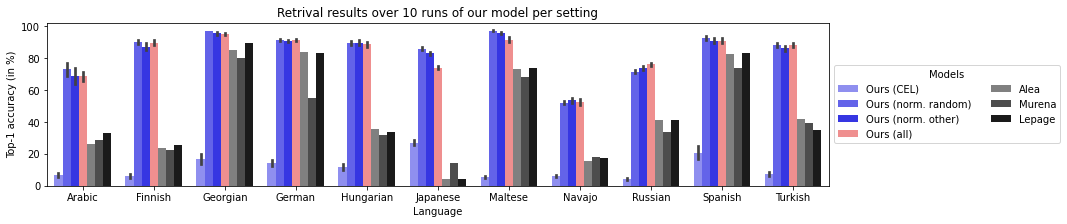

In [40]:
from matplotlib.colors import *

df_ = pd.concat([df[df["transfer"]=="transfer"], df_baseline])


hue_order = [
    #"Ours (cosine embedding loss)", "Ours (relative-all loss)", "Ours (relative-shuffle loss)", "Ours (sum of all losses)",
    "Ours (CEL)", "Ours (norm. random)", "Ours (norm. other)", "Ours (all)",
    "Alea", "Murena", "Lepage"
]
repl = {'cosine embedding loss': hue_order[0],
'relative shuffle': hue_order[1],
'relative all': hue_order[2],
"all": hue_order[3],
'alea': hue_order[4],
'murena': hue_order[5],
'lepage': hue_order[6]}
df_["criterion"] = df_["criterion"].replace(repl)
df_["Top-1 accuracy (in %)"] = df_["precision"] * 100
df_["Language"] = df_["lang"].str.capitalize()

palette = {
    # "cosine embedding loss": (1,0.1,0.1),
    # "relative all": (0.3,0.3,1),
    # "relative shuffle": (0.1,0.1,1),
    # "rel. shuffle + rel. all + cos. emb. loss": (1,0.1,1),
    hue_order[0]: (0.5,0.5,1),
    hue_order[1]: (0.3,0.3,1),
    hue_order[2]: (0.1,0.1,1),
    hue_order[3]: (1,0.5,0.5),
    hue_order[4]: (0.5,0.5,0.5),
    hue_order[5]: (0.3,0.3,0.3),
    hue_order[6]: (0.1,0.1,0.1)}

plt.figure(figsize=(14,3))
#sns.barplot(y="precision", x="lang", hue="criterion", data=df_, ci="sd", hue_order=["cosine embedding loss", "relative all", "relative shuffle", "all", 'alea', 'murena', 'lepage'], palette=palette)
sns.barplot(y="Top-1 accuracy (in %)", x="Language", hue="criterion", data=df_, ci="sd", hue_order=hue_order, palette=palette)
#plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title("Retrival results over 10 runs of our model per setting")

plt.legend(
    title = "Models",loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)

In [63]:

df_baseline["fails_pos_rate"] = df_baseline["fails_pos"]/df_baseline["total_pos"]
df_ = pd.concat([
    df[(df["transfer"]=="transfer") & (df["criterion"]=="relative shuffle")],
    df_baseline[~(df_baseline["criterion"]=="lepage")]])
df_["Top-1 accuracy (in %)"] = df_["precision"] * 100
repl = {'relative shuffle': "ANNr",
'alea': "Alea",
'murena': "Murena"}
df_["criterion"] = df_["criterion"].replace(repl)

##############################

# top 1/3/5/10 for all losses
zs = []
#pd.Series().item
converter_o = lambda x: f"$\mathbf{{{mean(x):5.02f}}} \pm {stdev(x):4.02f}$"
converter = lambda x: f"${mean(x):5.02f} \pm {stdev(x):4.02f}$"
converter_b = lambda x: f"${x.item():5.02f}$"#f"${x[0]:5.02f}$"
converter_b_r = lambda x: f"${x.item()*100:.3f}$" if x.item() > 0 else "--"#f"${x[0]:5.02f}$"
dict_ = {
    "ANNr": df_[df_["criterion"]=="ANNr"].groupby("lang")["Top-1 accuracy (in %)"].aggregate(converter_o),
    "3CosAdd": df_3cos[df_3cos["criterion"]=="3CosAdd"].groupby("lang")["precision %"].aggregate(converter),
    "3CosMul": df_3cos[df_3cos["criterion"]=="3CosMul"].groupby("lang")["precision %"].aggregate(converter),
    "Alea": 
        df_[df_["criterion"]=="Alea"].groupby("lang")["Top-1 accuracy (in %)"].aggregate(converter_b),
    "Murena":
        df_[df_["criterion"]=="Murena"].groupby("lang")["Top-1 accuracy (in %)"].aggregate(converter_b),
    "Alea_": 
        df_[df_["criterion"]=="Alea"].groupby("lang")["fails_pos_rate"].aggregate(converter_b_r),
    "Murena_":
        df_[df_["criterion"]=="Murena"].groupby("lang")["fails_pos_rate"].aggregate(converter_b_r),}
z = pd.DataFrame(dict_)
z.index = [k.capitalize() for k in z.index]
text = z.to_latex()
text = text.replace("\$", "$").replace("\\textbackslash ","\\").replace("\\{", "{").replace("\\}", "}").replace("\\_", "_")
print(text)

\begin{tabular}{llllllll}
\toprule
{} &                       ANNr &           3CosAdd &           3CosMul &     Alea &   Murena &    Alea_ &  Murena_ \\
\midrule
Arabic    &  $\mathbf{73.08} \pm 4.19$ &  $66.11 \pm 3.09$ &  $55.78 \pm 2.97$ &  $26.43$ &  $29.03$ &       -- &  $0.039$ \\
Finnish   &  $\mathbf{90.15} \pm 1.42$ &  $87.10 \pm 2.61$ &  $82.76 \pm 3.38$ &  $23.76$ &  $22.65$ &  $0.040$ &  $3.802$ \\
Georgian  &  $\mathbf{97.12} \pm 0.26$ &  $95.51 \pm 0.73$ &  $91.36 \pm 2.38$ &  $85.19$ &  $80.15$ &       -- &  $0.026$ \\
German    &  $\mathbf{91.47} \pm 0.55$ &  $82.24 \pm 4.35$ &  $79.17 \pm 5.31$ &  $84.19$ &  $55.05$ &  $0.023$ &  $1.998$ \\
Hungarian &  $\mathbf{89.42} \pm 1.43$ &  $85.60 \pm 2.77$ &  $74.92 \pm 5.69$ &  $35.49$ &  $31.68$ &  $0.002$ &  $0.102$ \\
Japanese  &  $\mathbf{86.12} \pm 0.76$ &  $73.29 \pm 4.36$ &  $65.02 \pm 5.34$ &  $ 4.03$ &  $14.35$ &       -- &       -- \\
Maltese   &  $\mathbf{97.16} \pm 0.30$ &  $95.60 \pm 2.22$ &  $78.37 \pm 1.45$ & 

In [72]:
from scipy.stats import ttest_rel, ttest_1samp

list_ = []
for lang in SIG2016_LANGUAGES:
    col1 = df_3cos[(df_3cos["criterion"]=="3CosAdd") & (df_3cos["lang"]==lang)]["precision"]
    #col2 = df_3cos[(df_3cos["criterion"]=="3CosMul") & (df_3cos["lang"]==lang)]["precision"]
    col2 = df_[(df_["criterion"]=="ANNr") & (df_["lang"]==lang)]["precision"]
    col3 = df_[((df_["criterion"]=="Kolmo") | (df_["criterion"]=="Alea")) & (df_["lang"]==lang)]["precision"].max()
    list_.append(tuple((col2.mean()-col1.mean(), lang)))
    #print(lang,"\t", col1.mean()-col2.mean(),"\t", ttest_rel(col1, col2).pvalue) # p-value < threshold = reject H0 = reject "no effect"
    print(lang,"\t", f"{ttest_1samp(col1, col3).pvalue:0.8f}")
sorted(list_)

arabic 	 0.00000000
finnish 	 0.00000000
georgian 	 0.00000000
german 	 0.18906106
hungarian 	 0.00000000
japanese 	 0.00000000
maltese 	 0.00000000
navajo 	 0.00000000
russian 	 0.00000001
spanish 	 0.00000014
turkish 	 0.00000000


[(0.015565150976181052, 'maltese'),
 (0.01557275652885437, 'spanish'),
 (0.01607450842857361, 'georgian'),
 (0.030543988943099953, 'finnish'),
 (0.038235992193222046, 'hungarian'),
 (0.06977224349975586, 'arabic'),
 (0.070116662979126, 'navajo'),
 (0.09232775568962093, 'german'),
 (0.09741213917732239, 'turkish'),
 (0.128220123052597, 'japanese'),
 (0.13135900497436526, 'russian')]

$$\text{Cosine embedding loss}(x_1,x_2,y) = \begin{cases}
        1 - \cos(x_1, x_2), & \text{if } y = 1 \\
        \max(0, \cos(x_1, x_2) - \text{margin}), & \text{if } y = -1
        \end{cases}$$

$$
\begin{split}
\mathcal{L}_\text{Cosine embedding loss}(a,b,c,d,d_\text{pred}) = 
&\text{Cosine embedding loss}(d_\text{pred},a,-1) + \\
&\text{Cosine embedding loss}(d_\text{pred},b,-1) + \\
&\text{Cosine embedding loss}(d_\text{pred},c,-1) + \\
&\text{Cosine embedding loss}(d_\text{pred},d,1)
\end{split}
$$

$$
\mathcal{L}_\text{Relative all}(a,b,c,d,d_\text{pred}) = 
\frac{1+6\times MSE(d_\text{pred}, d)}{1 +
                MSE(a,b) +
                MSE(a,c) +
                MSE(a,d) +
                MSE(b,c) +
                MSE(b,d) +
                MSE(c,d)}
$$

$$
\mathcal{L}_\text{Relative shuffle}(d,d_\text{pred}) = 
\frac{1+MSE(d_\text{pred}, d)}{1 + MSE(d_\text{pred}, \text{batch permute}(d))} \approx \frac{1+MSE(d_\text{pred}, d)}{1 + MSE(d_\text{pred}, x)}
$$

With $x$ a randomly selected embedding.
As an approximation, we use $\text{batch permute}(d)$, which randomly permute a batch of embeddings $d$ along the batch dimension.
This loss compares the distance between $d_\text{pred}$ and $d$ with the distance between $d_\text{pred}$ and a random (unrelated) vector.

$$
\mathcal{L}_\text{Sum of all}(a,b,c,d,d_\text{pred}) = \mathcal{L}_\text{Cosine embedding loss}(a,b,c,d,d_\text{pred})+\mathcal{L}_\text{Relative all}(a,b,c,d,d_\text{pred}) +\mathcal{L}_\text{Relative shuffle}(d,d_\text{pred})
$$

<Figure size 1224x360 with 0 Axes>

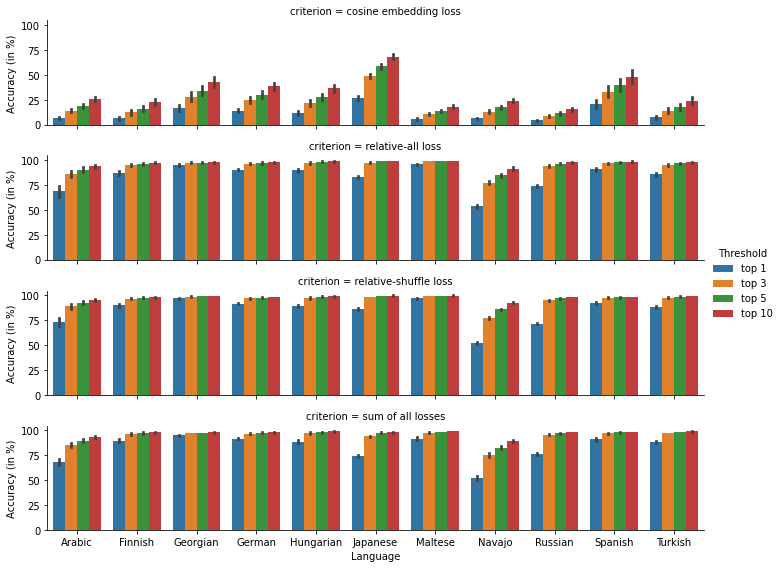

In [11]:
dftr = df[df["transfer"]=="transfer"]
df__ = pd.concat([
    dftr[["lang", "precision", "seed_id", "criterion"]].rename({'precision': 'Accuracy'}, axis='columns'),
    dftr[["lang", "success@3", "seed_id", "criterion"]].rename({'success@3': 'Accuracy'}, axis='columns'),
    dftr[["lang", "success@5", "seed_id", "criterion"]].rename({'success@5': 'Accuracy'}, axis='columns'),
    dftr[["lang", "success@10", "seed_id", "criterion"]].rename({'success@10': 'Accuracy'}, axis='columns')
], keys=["top 1", "top 3", "top 5", "top 10"])
df__=df__.rename_axis(['Threshold', "timestamp"]).reset_index(level=0)


repl = {'cosine embedding loss': "cosine embedding loss",
'relative shuffle': "relative-shuffle loss",
'relative all': "relative-all loss",
"all": "sum of all losses",}
df__["criterion"] = df__["criterion"].replace(repl)
df__["Accuracy (in %)"] = df__["Accuracy"] * 100
df__["Language"] = df__["lang"].str.capitalize()

plt.figure(figsize=(17,5))
sns.catplot(y="Accuracy (in %)", x="Language", hue="Threshold", row="criterion", data=df__, ci="sd", kind="bar",
    aspect=5, height=2,
    row_order=["cosine embedding loss", "relative-all loss", "relative-shuffle loss", "sum of all losses"])
# #plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
# plt.title("Retrival results over 10 runs of our model per setting")

# plt.legend(
#     title = "Models",loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)

<Figure size 1224x360 with 0 Axes>

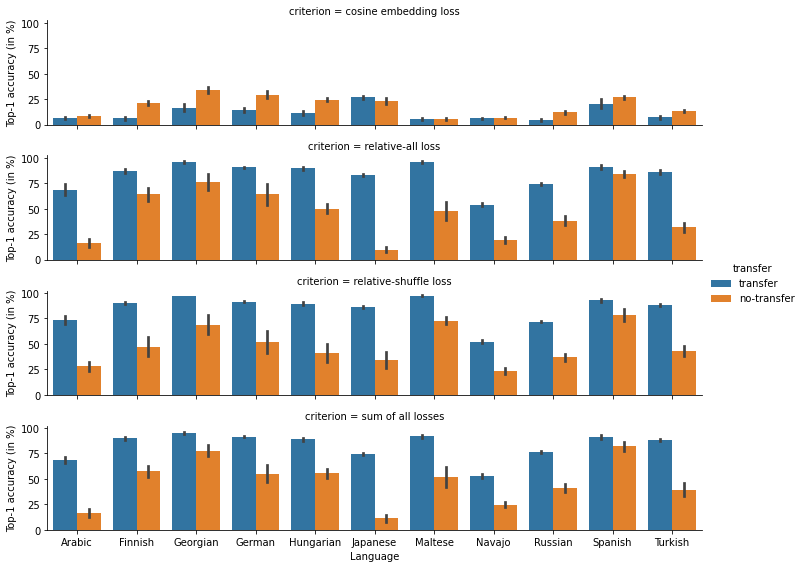

In [12]:
df___ = df.copy()
repl = {'cosine embedding loss': "cosine embedding loss",
'relative shuffle': "relative-shuffle loss",
'relative all': "relative-all loss",
"all": "sum of all losses",}
df___["criterion"] = df___["criterion"].replace(repl)
df___["Top-1 accuracy (in %)"] = df___["precision"] * 100
df___["Language"] = df___["lang"].str.capitalize()
plt.figure(figsize=(17,5))
sns.catplot(y="Top-1 accuracy (in %)", x="Language", hue="transfer", row="criterion", data=df___, ci="sd", kind="bar",
    aspect=5, height=2,
    row_order=["cosine embedding loss", "relative-all loss", "relative-shuffle loss", "sum of all losses"])

In [13]:
# top 1/3/5/10 for all losses
zs = []
keys=[]
mdf = df___[df___["transfer"]=="transfer"]
for crit, crit_name in [("cosine embedding loss", "$\mathcal{L}_{\\text{CEL}}$"), ("relative-all loss", "$\mathcal{L}_{\\text{norm. other}}$"), ("relative-shuffle loss", "$\mathcal{L}_{\\text{norm. random}}$"), ("sum of all losses", "$\mathcal{L}_{\\text{all}}$")]:
    converter = lambda x: f"${mean(x)*100:5.02f} \pm {stdev(x)*100:4.02f}$"
    y_1 = mdf[mdf["criterion"] == crit].groupby("lang")["precision"].aggregate(converter)
    y_3 = mdf[mdf["criterion"] == crit].groupby("lang")["success@3"].aggregate(converter)
    y_5 = mdf[mdf["criterion"] == crit].groupby("lang")["success@5"].aggregate(converter)
    y_10 = mdf[mdf["criterion"] == crit].groupby("lang")["success@10"].aggregate(converter)
    z = pd.DataFrame({"top-$1$":y_1,"top-$3$":y_3,"top-$5$":y_5,"top-$10$":y_10})
    zs.append(z)
    keys.append(crit_name)
z = pd.concat(zs,axis=1,keys=keys)
z = zs[2]
z.index = [k.capitalize() for k in z.index]
print(z.to_latex().replace("\$", "$").replace("\\textbackslash ","\\").replace("\\{", "{").replace("\\}", "}").replace("\\_", "_"))

\begin{tabular}{lllll}
\toprule
{} &           top-$1$ &           top-$3$ &           top-$5$ &          top-$10$ \\
\midrule
Arabic    &  $73.08 \pm 4.19$ &  $89.05 \pm 2.43$ &  $92.68 \pm 1.74$ &  $95.69 \pm 1.04$ \\
Finnish   &  $90.15 \pm 1.42$ &  $96.73 \pm 0.87$ &  $97.57 \pm 0.63$ &  $98.28 \pm 0.40$ \\
Georgian  &  $97.12 \pm 0.26$ &  $98.86 \pm 0.16$ &  $99.25 \pm 0.16$ &  $99.58 \pm 0.10$ \\
German    &  $91.47 \pm 0.55$ &  $96.99 \pm 0.41$ &  $97.84 \pm 0.39$ &  $98.50 \pm 0.31$ \\
Hungarian &  $89.42 \pm 1.43$ &  $97.48 \pm 0.73$ &  $98.57 \pm 0.54$ &  $99.15 \pm 0.34$ \\
Japanese  &  $86.12 \pm 0.76$ &  $98.48 \pm 0.19$ &  $99.70 \pm 0.15$ &  $99.88 \pm 0.09$ \\
Maltese   &  $97.16 \pm 0.30$ &  $99.50 \pm 0.11$ &  $99.75 \pm 0.08$ &  $99.89 \pm 0.04$ \\
Navajo    &  $52.22 \pm 1.18$ &  $77.67 \pm 1.13$ &  $85.89 \pm 0.90$ &  $92.87 \pm 0.80$ \\
Russian   &  $71.66 \pm 0.76$ &  $95.18 \pm 0.54$ &  $97.24 \pm 0.44$ &  $98.18 \pm 0.29$ \\
Spanish   &  $92.63 \pm 1.25$ &  $97

In [12]:
# top 1/3/5/10 for all losses
zs = []
keys=["Transfer from ANNc", "From scratch"]
for trf, trf_name in zip(["transfer", "no-transfer"], keys):
    mdf = df___[df___["transfer"]==trf]
    dict_ = dict()
    for crit, crit_name in [("cosine embedding loss", "$\mathcal{L}_{\\text{CEL}}$"), ("relative-all loss", "$\mathcal{L}_{\\text{norm. other}}$"), ("relative-shuffle loss", "$\mathcal{L}_{\\text{norm. random}}$"), ("sum of all losses", "$\mathcal{L}_{\\text{all}}$")]:
        converter = lambda x: f"${mean(x)*100:5.02f} \pm {stdev(x)*100:4.02f}$"
        y_1 = mdf[mdf["criterion"] == crit].groupby("lang")["precision"].aggregate(converter)
        dict_[crit_name]=y_1
    z = pd.DataFrame(dict_)
    zs.append(z)
z = pd.concat(zs,axis=1,keys=keys)
z.index = [k.capitalize() for k in z.index]
text = z.to_latex()
text = text.replace("\$", "$").replace("\\textbackslash ","\\").replace("\\{", "{").replace("\\}", "}").replace("\\_", "_")
print(text)

\begin{tabular}{lllllllll}
\toprule
{} & \multicolumn{4}{l}{Transfer from ANNc} & \multicolumn{4}{l}{From scratch} \\
{} & $\mathcal{L}_{\text{CEL}}$ & $\mathcal{L}_{\text{norm. other}}$ & $\mathcal{L}_{\text{norm. random}}$ & $\mathcal{L}_{\text{all}}$ & $\mathcal{L}_{\text{CEL}}$ & $\mathcal{L}_{\text{norm. other}}$ & $\mathcal{L}_{\text{norm. random}}$ & $\mathcal{L}_{\text{all}}$ \\
\midrule
Arabic    &           $ 6.86 \pm 1.08$ &                   $68.84 \pm 5.54$ &                    $73.08 \pm 4.19$ &           $68.59 \pm 3.17$ &           $ 8.53 \pm 0.89$ &                   $16.01 \pm 4.20$ &                    $27.90 \pm 4.66$ &           $16.45 \pm 4.35$ \\
Finnish   &           $ 6.23 \pm 1.27$ &                   $87.37 \pm 2.11$ &                    $90.15 \pm 1.42$ &           $89.90 \pm 1.61$ &           $21.31 \pm 2.31$ &                   $64.14 \pm 7.07$ &                    $47.25 \pm 9.82$ &           $57.35 \pm 5.46$ \\
Georgian  &           $16.82 \pm 3.33$ &   

In [30]:

mdf = df___[df___["transfer"]=="transfer"]
mdf.columns
#(mdf["epochs_total"] < 50).any() -> False
converter = lambda x: f"${mean(x):5.01f} \pm {stdev(x):4.01f}$ ({min(x)}, {max(x)})"
gpe = mdf[mdf["criterion"]=="relative-shuffle loss"].groupby("Language")["epochs_no_emb"]
z = gpe.aggregate(converter)
z=pd.concat([
    mdf[mdf["criterion"]=="relative-shuffle loss"].groupby("Language")["epochs_no_emb"].aggregate(converter),
    mdf[mdf["criterion"]=="relative-shuffle loss"].groupby("Language")["epochs_no_emb"].aggregate(converter),
    mdf[mdf["criterion"]=="relative-shuffle loss"].groupby("Language")["epochs_no_emb"].aggregate(converter),
    mdf[mdf["criterion"]=="relative-shuffle loss"].groupby("Language")["epochs_no_emb"].aggregate(converter),], keys=[
        "$\mathcal{L}_{\\text{CEL}}$", "min", "max"], axis=1)
text = z.to_latex()
text = text.replace("\$", "$").replace("\\textbackslash ","\\").replace("\\{", "{").replace("\\}", "}").replace("\\_", "_")
print(text)

\begin{tabular}{llrr}
\toprule
{} &     epochs_no_emb &  min &  max \\
Language  &                   &      &      \\
\midrule
Arabic    &  $ 19.4 \pm  2.5$ &   17 &   23 \\
Finnish   &  $ 22.8 \pm  3.2$ &   17 &   28 \\
Georgian  &  $ 21.0 \pm  3.6$ &   15 &   26 \\
German    &  $ 21.2 \pm  3.1$ &   16 &   26 \\
Hungarian &  $ 20.4 \pm  4.2$ &   16 &   27 \\
Japanese  &  $ 25.8 \pm  3.4$ &   18 &   29 \\
Maltese   &  $ 20.9 \pm  2.9$ &   18 &   27 \\
Navajo    &  $ 14.4 \pm  2.1$ &   11 &   18 \\
Russian   &  $ 18.6 \pm  2.5$ &   15 &   23 \\
Spanish   &  $ 19.7 \pm  4.8$ &   16 &   31 \\
Turkish   &  $ 21.7 \pm  3.8$ &   16 &   27 \\
\bottomrule
\end{tabular}

